<a href="https://colab.research.google.com/github/jjoseph2008/INSE6220/blob/main/Date_Fruit_Classification_and_PCA_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification). 

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 6.5 MB/s 
     |████████████████████████████████| 2.0 MB 51.6 MB/s 
     |████████████████████████████████| 56 kB 2.3 MB/s 
     |████████████████████████████████| 261 kB 39.0 MB/s 
     |████████████████████████████████| 116 kB 61.1 MB/s 
     |████████████████████████████████| 16.8 MB 590 kB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 6.8 MB 20.3 MB/s 
     |████████████████████████████████| 167 kB 61.6 MB/s 
     |████████████████████████████████| 1.7 MB 57.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████| 636 kB 61.7 MB/s 
     |████████████████████████████████| 10.9 MB 57.4 MB/s 
     |████████████████████████████████| 690 kB 48.3 MB/s 
     |█████████████████

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


 **Dataset**

This dataset comprises of the external features of Date fruit. The factors such as shape, size, colour can help us determine the type of fruit. This data set studies 7 different types of dates and their features.

The original dataset contains 898 rows and 34 columns. This datset has been modified to use only 8 columns out the 34, out of which one column is for the class. For the this project we will only be using 300 rows and 3 types of Dates fruit. 

Classification information- 

1 - Barhee,  
2 - Deglet Nour,  
3 - Sukkary


Attribute Information:

1. AREA,
2. PERIMETER,
3. MAJOR_AXIS,
4. MINOR_AXIS,
5. SOLIDITY,
6. ROUNDNESS,
7. COMPACTNESS
8. CLASS

All of these parameters were real-valued discrete.

https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jjoseph2008/INSE6220/main/Date_Fruit_Datasets.csv')
df.head(25)

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  SOLIDITY  ROUNDNESS  \
0   422163  2378.9080    837.8484    645.6693    0.9947     0.9374   
1   338136  2085.1440    723.8198    595.2073    0.9974     0.9773   
2   526843  2647.3940    940.7379    715.3638    0.9962     0.9446   
3   416063  2351.2100    827.9804    645.2988    0.9948     0.9458   
4   347562  2160.3540    763.9877    582.8359    0.9908     0.9358   
5   408953  2326.6931    840.1821    622.0076    0.9974     0.9493   
6   451414  2457.2080    889.3253    652.4316    0.9970     0.9395   
7   382636  2275.7791    808.0833    609.2819    0.9931     0.9284   
8   546063  2714.9480    916.3737    766.4536    0.9882     0.9310   
9   420044  2391.1230    836.9280    645.1822    0.9918     0.9232   
10  364495  2216.4900    790.9014    590.7698    0.9949     0.9323   
11  404243  2345.5349    823.7634    628.8527    0.9921     0.9234   
12  407789  2308.4099    788.7270    664.5451    0.9958     0.9617   
13  340451  2098.1631    724.4111    600.3284    0.9971     0.9718   
14  467092  2514.2429    895.3616    669.6182    0.9946     0.9285   
15  386374  2265.6660    826.3535    597.2911    0.9968     0.9459   
16  413069  2350.4109    821.2114    645.8047    0.9917     0.9396   
17  396792  2291.0701    790.0845    644.6891    0.9967     0.9499   
18  358545  2199.5081    775.7432    593.7310    0.9911     0.9313   
19  397744  2337.2251    869.5142    583.9490    0.9947     0.9150   
20  398901  2299.3350    812.7031    628.3113    0.9965     0.9481   
21  342155  2151.8960    760.6585    575.3604    0.9904     0.9285   
22  408220  2317.6689    769.1027    681.1285    0.9927     0.9550   
23  306560  2015.1980    715.4261    547.1210    0.9952     0.9486   
24  354590  2181.7390    772.2312    587.4540    0.9954     0.9361   

    COMPACTNESS  class  
0        0.8750      1  
1        0.9065      1  
2        0.8706      1  
3        0.8791      1  
4        0.8707      1  
5        0.8589      1  
6        0.8525      1  
7        0.8638      1  
8        0.9099      1  
9        0.8738      1  
10       0.8613      1  
11       0.8709      1  
12       0.9136      1  
13       0.9089      1  
14       0.8613      1  
15       0.8488      1  
16       0.8831      1  
17       0.8996      1  
18       0.8710      1  
19       0.8184      1  
20       0.8769      1  
21       0.8677      1  
22       0.9374      1  
23       0.8733      1  
24       0.8701      1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AREA         300 non-null    int64  
 1   PERIMETER    300 non-null    float64
 2   MAJOR_AXIS   300 non-null    float64
 3   MINOR_AXIS   300 non-null    float64
 4   SOLIDITY     300 non-null    float64
 5   ROUNDNESS    300 non-null    float64
 6   COMPACTNESS  300 non-null    float64
 7   class        300 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

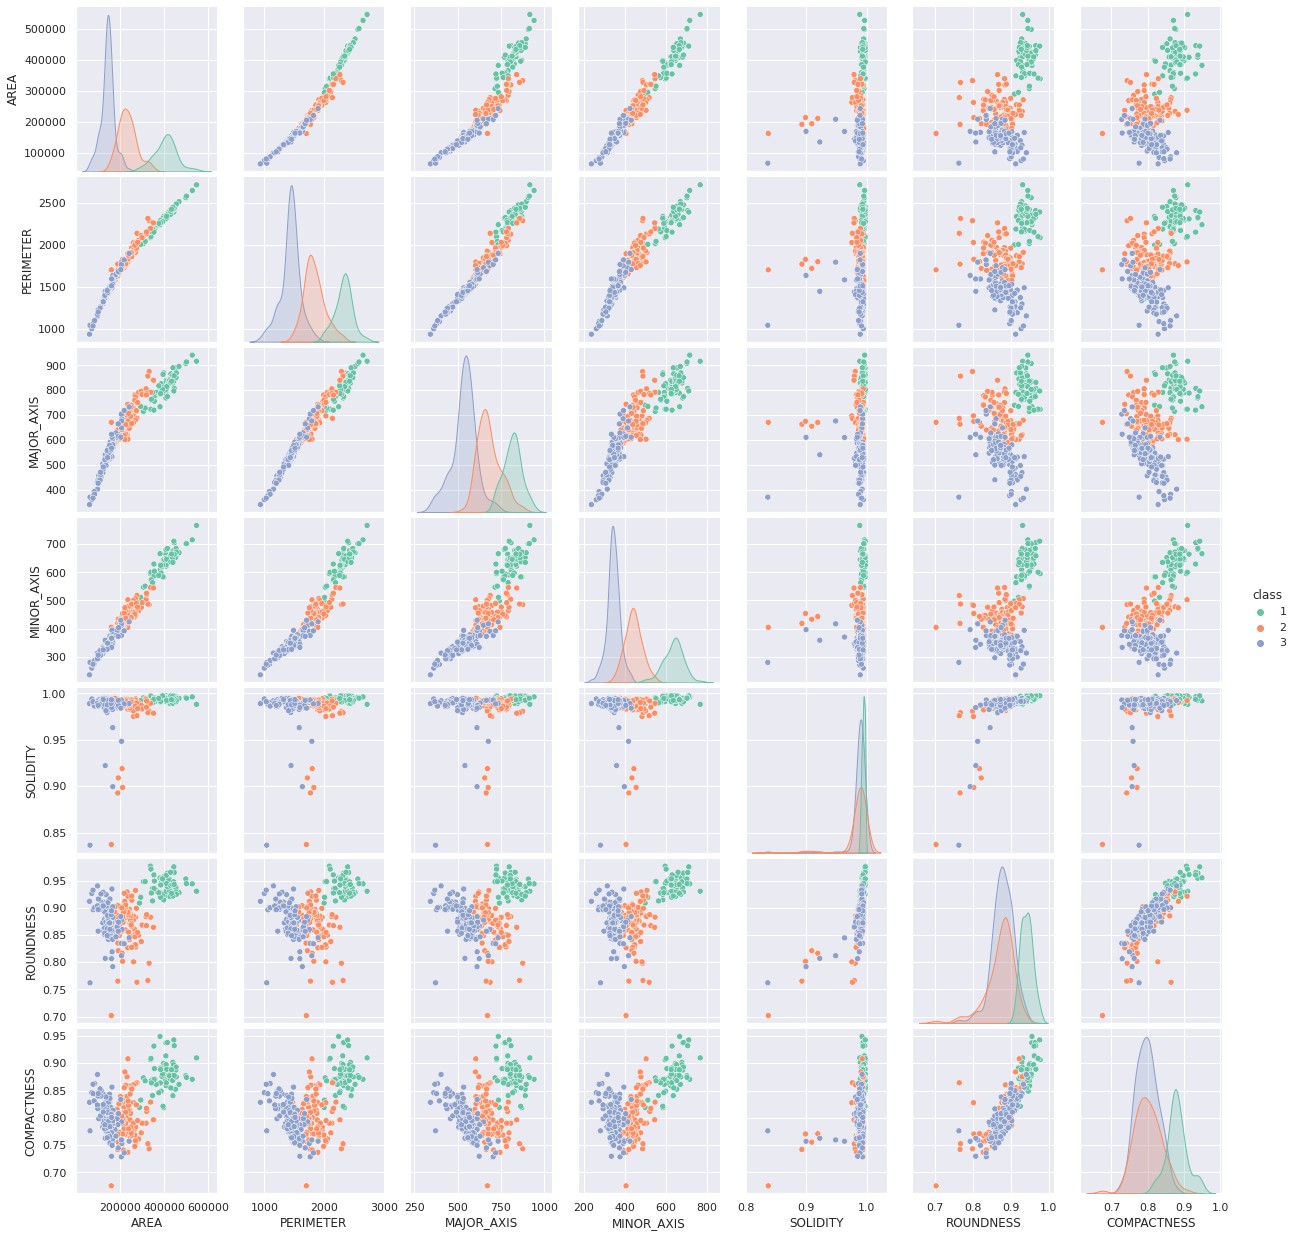

In [9]:
sns.pairplot(df, hue='class', palette = 'Set2')
plt.show()

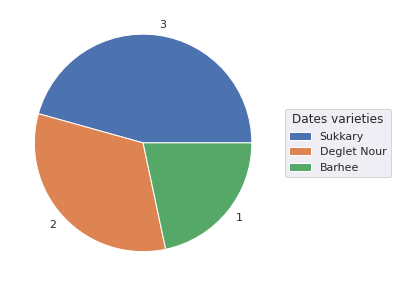

In [10]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
labels=('Sukkary','Deglet Nour','Barhee')
plt.legend(labels,loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),title="Dates varieties")
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['class'])
X.head(10)

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  SOLIDITY  ROUNDNESS  COMPACTNESS
0  422163  2378.9080    837.8484    645.6693    0.9947     0.9374       0.8750
1  338136  2085.1440    723.8198    595.2073    0.9974     0.9773       0.9065
2  526843  2647.3940    940.7379    715.3638    0.9962     0.9446       0.8706
3  416063  2351.2100    827.9804    645.2988    0.9948     0.9458       0.8791
4  347562  2160.3540    763.9877    582.8359    0.9908     0.9358       0.8707
5  408953  2326.6931    840.1821    622.0076    0.9974     0.9493       0.8589
6  451414  2457.2080    889.3253    652.4316    0.9970     0.9395       0.8525
7  382636  2275.7791    808.0833    609.2819    0.9931     0.9284       0.8638
8  546063  2714.9480    916.3737    766.4536    0.9882     0.9310       0.9099
9  420044  2391.1230    836.9280    645.1822    0.9918     0.9232       0.8738

In [12]:
X.describe().transpose()

count           mean            std         min            25%  \
AREA         300.0  230094.543333  107398.301398  63328.0000  147133.750000   
PERIMETER    300.0    1754.932418     381.560735    933.9370    1453.035175   
MAJOR_AXIS   300.0     643.911604     127.660189    342.7969     548.455950   
MINOR_AXIS   300.0     437.530450     118.841355    235.6772     345.101625   
SOLIDITY     300.0       0.987530       0.017742      0.8366       0.988100   
ROUNDNESS    300.0       0.889182       0.040541      0.7019       0.867375   
COMPACTNESS  300.0       0.816282       0.046297      0.6752       0.782250   

                      50%            75%          max  
AREA         197947.00000  281515.000000  546063.0000  
PERIMETER      1702.08800    2027.845075    2714.9480  
MAJOR_AXIS      624.36020     741.276725     940.7379  
MINOR_AXIS      401.33275     489.901325     766.4536  
SOLIDITY          0.99090       0.993000       0.9974  
ROUNDNESS         0.88660       0.916625       0.9773  
COMPACTNESS       0.80845       0.848350       0.9492

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  SOLIDITY  ROUNDNESS  \
0  1.791363   1.638057    1.521703    1.754327  0.404774   1.191348   
1  1.007669   0.866869    0.626990    1.329001  0.557206   2.177185   
2  2.767681   2.342885    2.329013    2.341757  0.489458   1.369243   
3  1.734470   1.565344    1.444274    1.751204  0.410419   1.398892   
4  1.095583   1.064310    0.942163    1.224727  0.184594   1.151815   
5  1.668158   1.500983    1.540014    1.554891  0.557206   1.485369   
6  2.064178   1.843609    1.925610    1.811324  0.534623   1.243234   
7  1.422707   1.367323    1.288154    1.447631  0.314443   0.968978   
8  2.946940   2.520227    2.137842    2.772374  0.037807   1.033218   
9  1.771600   1.670124    1.514481    1.750222  0.241050   0.840498   

   COMPACTNESS  
0     1.270411  
1     1.951934  
2     1.175214  
3     1.359117  
4     1.177377  
5     0.922076  
6     0.783608  
7     1.028091  
8     2.025496  
9     1.244448

In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
AREA         300.0  3.708145e-16  1.001671 -1.555380 -0.773750 -0.299830   
PERIMETER    300.0 -6.172840e-16  1.001671 -2.155272 -0.792539 -0.138727   
MAJOR_AXIS   300.0  9.377684e-16  1.001671 -2.362662 -0.748982 -0.153408   
MINOR_AXIS   300.0 -8.511710e-17  1.001671 -1.701348 -0.779049 -0.305097   
SOLIDITY     300.0  2.553837e-15  1.001671 -8.520986  0.032161  0.190239   
ROUNDNESS    300.0 -1.868320e-15  1.001671 -4.627315 -0.538809 -0.063804   
COMPACTNESS  300.0 -1.002901e-16  1.001671 -3.052397 -0.736298 -0.169443   

                  75%       max  
AREA         0.479583  2.946940  
PERIMETER    0.716449  2.520227  
MAJOR_AXIS   0.763964  2.329013  
MINOR_AXIS   0.441415  2.772374  
SOLIDITY     0.308798  0.557206  
ROUNDNESS    0.678045  2.177185  
COMPACTNESS  0.693820  2.875777

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

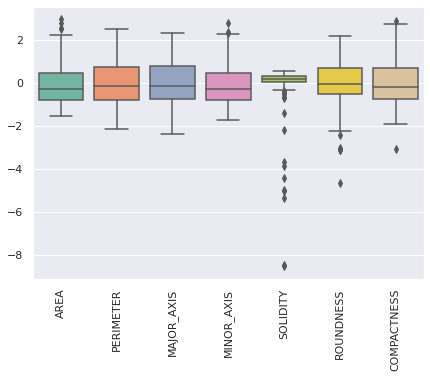

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

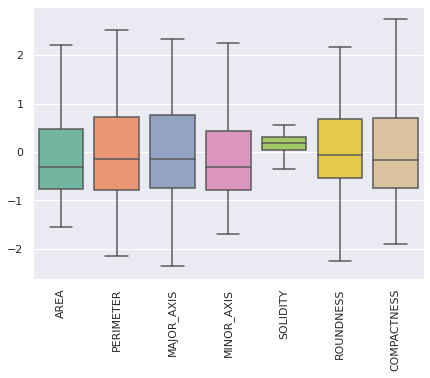

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2", showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

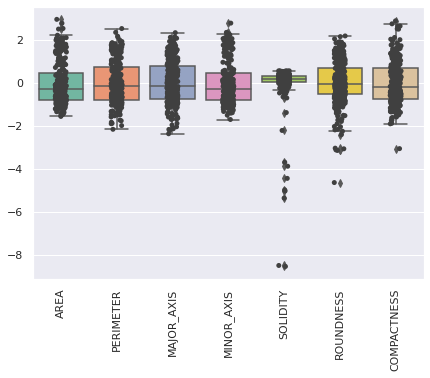

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

**Correlation Matrix**

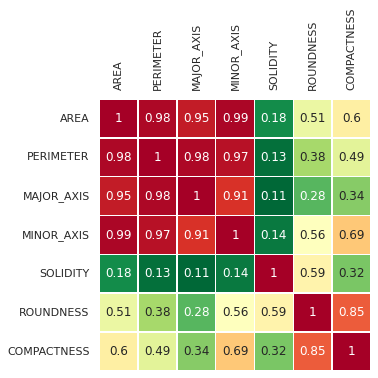

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

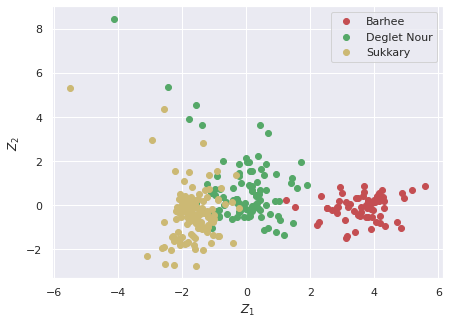

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# Barhee	1
# Deglet Nour	2
# Sukkary	3

idx_Barhee = np.where(y == 1)
idx_Deglet_Nour = np.where(y == 2)
idx_Sukkary = np.where(y == 3)


plt. figure()
plt.scatter(Z[idx_Barhee,0], Z[idx_Barhee,1], c='r', label='Barhee')
plt.scatter(Z[idx_Deglet_Nour,0], Z[idx_Deglet_Nour,1], c='g', label='Deglet Nour')
plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='y', label='Sukkary')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

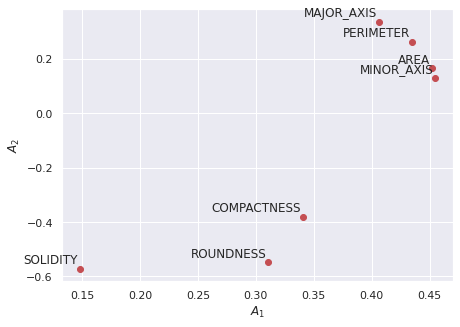

In [21]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [22]:
# Eigen Values
cov_mat = np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
for vals in eigen_vals:
  print(f'{vals:.3f}')

4.671
1.570
0.671
0.101
0.008
0.002
0.000


In [23]:
# Eigen vector matrix
print("Raw Eigenvector: \n", eigen_vecs)

Raw Eigenvector: 
 [[ 0.45190565  0.16568425  0.03589377  0.02932462  0.82870276  0.28150681
  -0.01368788]
 [ 0.43466775  0.26313535  0.12504254 -0.09413322 -0.28955065  0.03226526
   0.795265  ]
 [ 0.40604711  0.33664351  0.2757648   0.15312845 -0.4423161   0.37501019
  -0.53481414]
 [ 0.45491319  0.13063211 -0.10847805 -0.05564544  0.01310341 -0.837905
  -0.24262907]
 [ 0.14843408 -0.57202679  0.75118462 -0.27954283  0.03720775 -0.07908136
  -0.02630347]
 [ 0.31097302 -0.5479005  -0.1922786   0.7405738  -0.0864499   0.02982195
   0.09652608]
 [ 0.34101038 -0.38145158 -0.54222956 -0.58063803 -0.15728609  0.26429573
  -0.11163353]]


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


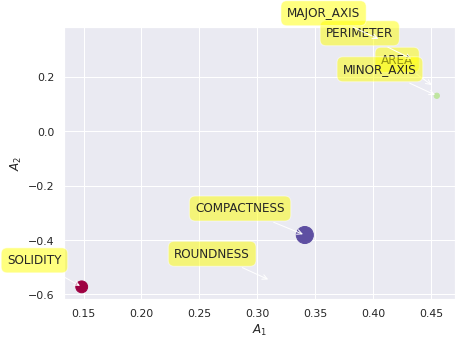

In [24]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

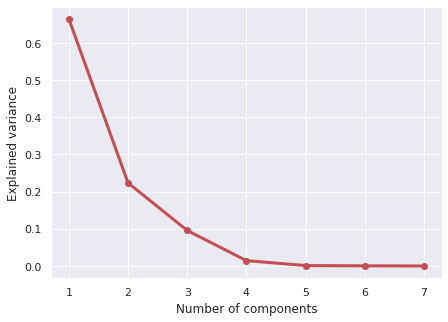

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

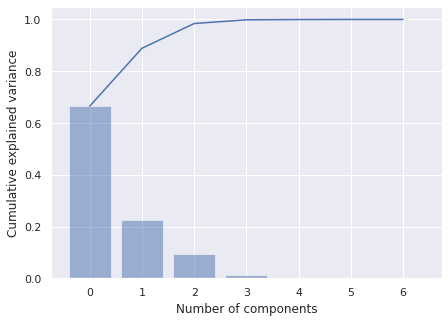

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

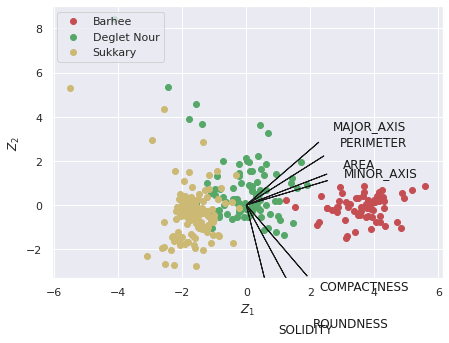

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')


plt.scatter(Z[idx_Barhee,0], Z[idx_Barhee,1], c='r', label='Barhee')
plt.scatter(Z[idx_Deglet_Nour,0], Z[idx_Deglet_Nour,1], c='g', label='Deglet Nour')
plt.scatter(Z[idx_Sukkary,0], Z[idx_Sukkary,1], c='y', label='Sukkary')

plt.legend(loc='upper left')

##**Using PCA Library**

In [28]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0a7126c5837baee2dd9a635292efe6ead40fac26b81079f541abae528f4f2faa
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [30]:
out['PC']

PC1       PC2       PC3
0    3.801269  0.100393  0.115413
1    3.116723 -1.476444  0.885159
2    5.179302  0.686533 -0.247695
3    3.806722 -0.105421  0.231326
4    2.684510 -0.247045  0.421846
..        ...       ...       ...
295 -1.732884 -1.328510  0.149322
296 -1.185479 -0.520739  0.018401
297 -0.233746 -0.132868  0.411368
298 -1.100035 -0.682163 -0.195969
299 -2.099469 -1.623570  0.958807

[300 rows x 3 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07e9766e50>)

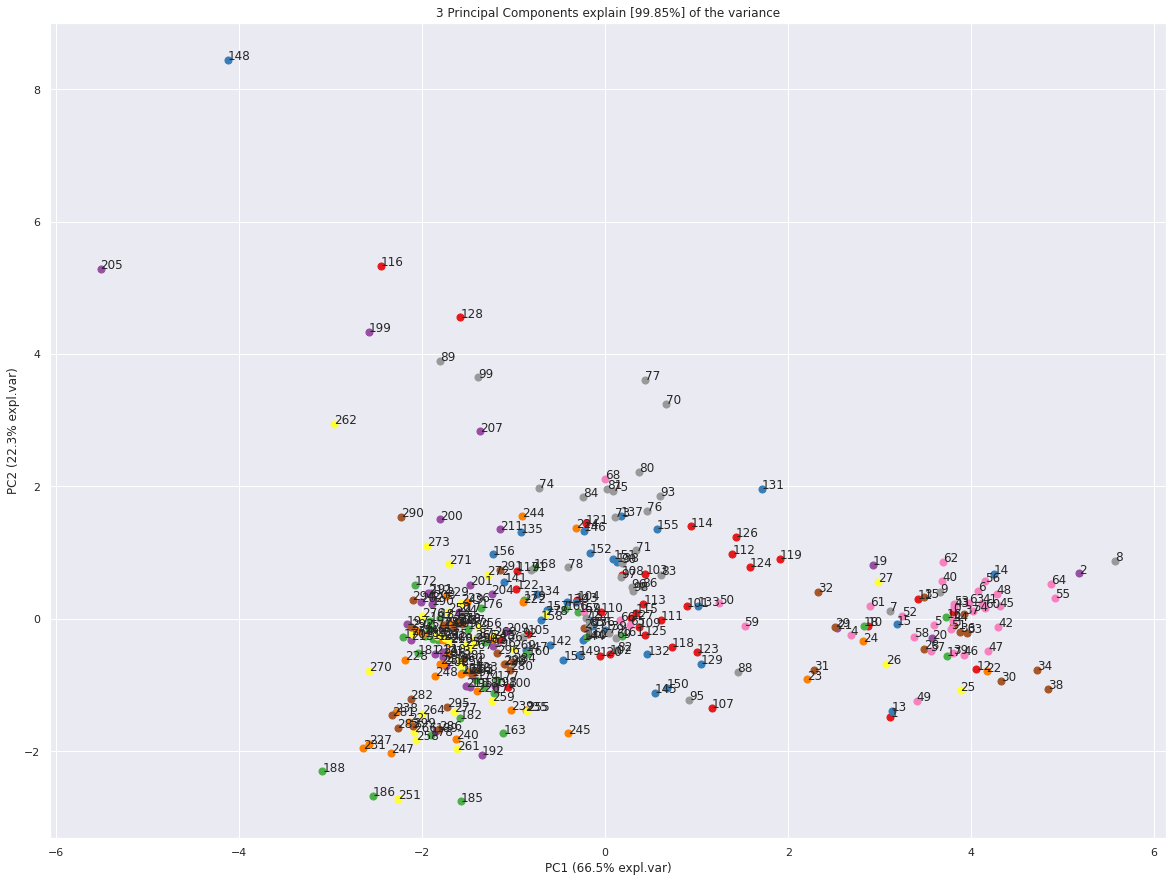

In [31]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [32]:
A = out['loadings'].T

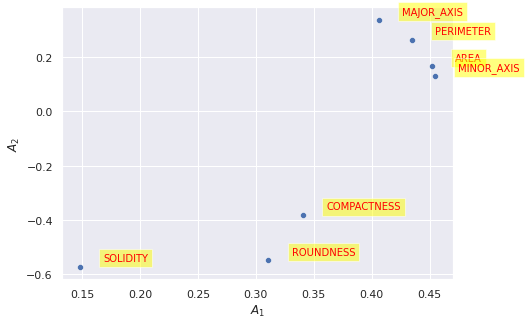

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

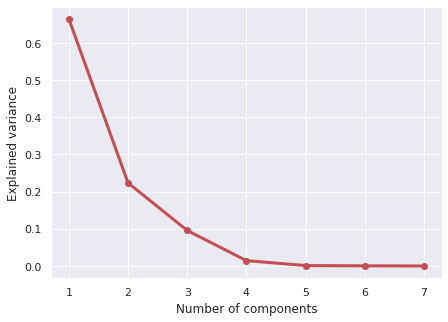

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

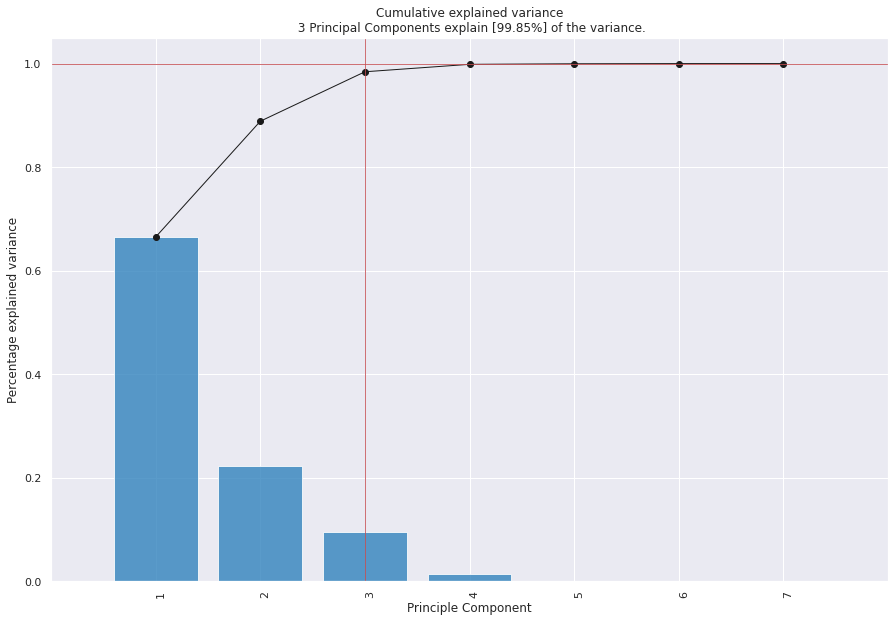

<Figure size 504x360 with 0 Axes>

In [35]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


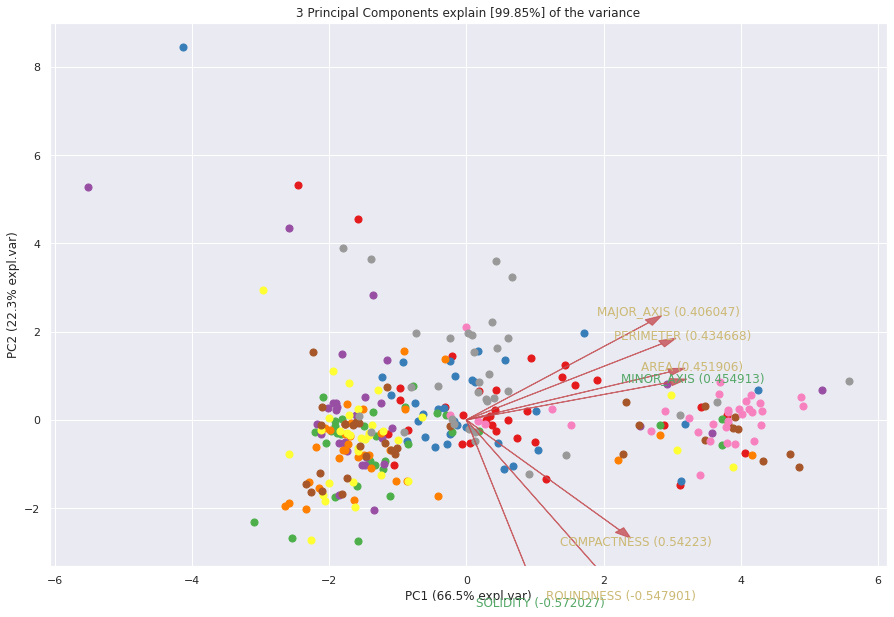

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07e4132310>)

In [36]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


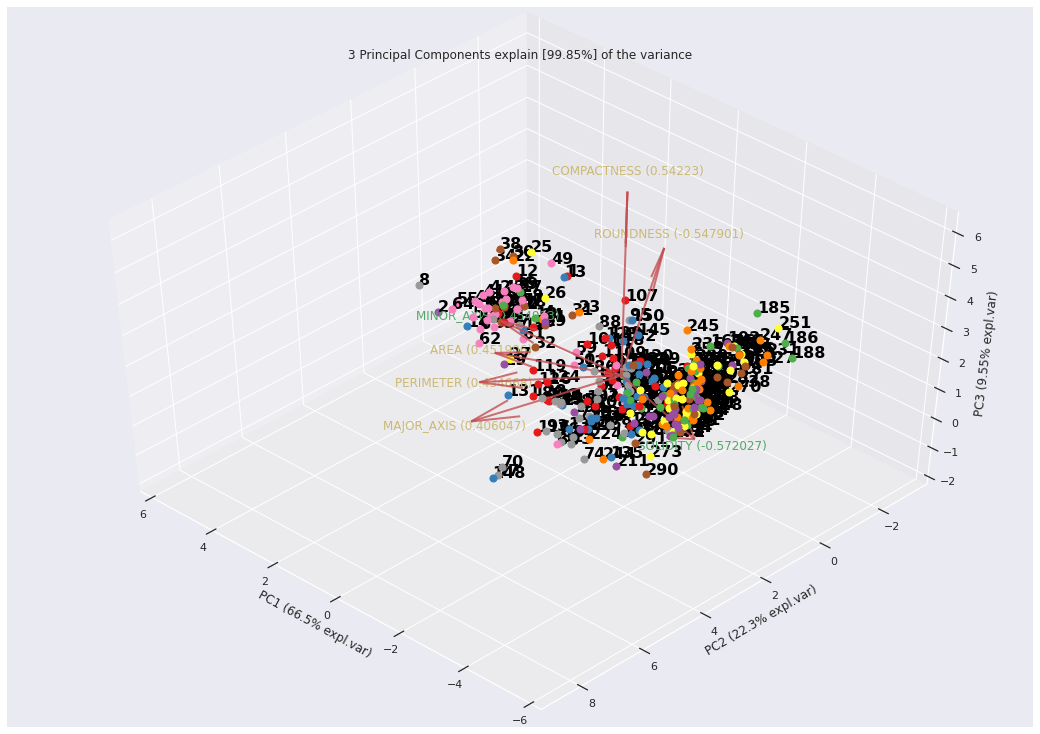

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f07e1ca60d0>)

In [37]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [38]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [39]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (270, 8)
Unseen Data For Predictions: (30, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [40]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 7)
12                    Transformed Test Set           (82, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ea98
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [41]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9211  0.9716  0.9290  0.9268   
lda          Linear Discriminant Analysis    0.9155  0.9758  0.9223  0.9214   
et                 Extra Trees Classifier    0.9053  0.9764  0.9175  0.9103   
lr                    Logistic Regression    0.8997  0.9745  0.9050  0.9063   
gbc          Gradient Boosting Classifier    0.8947  0.9540  0.9067  0.9069   
ridge                    Ridge Classifier    0.8944  0.0000  0.9078  0.9077   
lightgbm  Light Gradient Boosting Machine    0.8895  0.9664  0.9035  0.8987   
knn                K Neighbors Classifier    0.8889  0.9551  0.8997  0.9017   
nb                            Naive Bayes    0.8889  0.9717  0.8950  0.8977   
qda       Quadratic Discriminant Analysis    0.8889  0.9682  0.9013  0.8929   
ada                  Ada Boost Classifier    0.8842  0.9618  0.8999  0.8748   
dt               Decision Tree Classifier    0.8678  0.8899  0.8794  0.8724   
dummy                    Dummy Classifier    0.4415  0.5000  0.3333  0.1955   
svm                   SVM - Linear Kernel    0.3292  0.0000  0.3333  0.1158   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9205  0.8764  0.8802     0.522  
lda       0.9152  0.8682  0.8717     0.016  
et        0.9047  0.8520  0.8554     0.473  
lr        0.8984  0.8433  0.8478     0.568  
gbc       0.8910  0.8342  0.8437     0.339  
ridge     0.8946  0.8362  0.8434     0.025  
lightgbm  0.8862  0.8259  0.8346     0.111  
knn       0.8885  0.8279  0.8342     0.138  
nb        0.8899  0.8278  0.8310     0.019  
qda       0.8882  0.8265  0.8294     0.015  
ada       0.8695  0.8211  0.8442     0.124  
dt        0.8638  0.7908  0.7975     0.027  
dummy     0.2708  0.0000  0.0000     0.014  
svm       0.1695  0.0000  0.0000     0.078

In [42]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Create a Model**

For my project I will use these 3 classification algorithms. 

* Random Forest ('rf')
* K Neighbors Classifier ('knn')
* Naive bayes ('nb')


**Create Naive Bayes Classifier**

In [43]:
nb = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9908  0.9107  0.8947  0.8947  0.8362  0.8362
1       0.7895  0.9358  0.8214  0.7895  0.7895  0.6724  0.6724
2       0.8947  0.9633  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.9474  0.9781  0.9524  0.9579  0.9483  0.9191  0.9231
4       0.8947  0.9664  0.9074  0.9053  0.8961  0.8369  0.8406
5       0.8947  0.9838  0.8796  0.9211  0.8969  0.8341  0.8452
6       0.8421  0.9425  0.8704  0.8677  0.8445  0.7585  0.7684
7       0.8421  0.9831  0.8361  0.8571  0.8453  0.7574  0.7607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.8889  0.9735  0.8611  0.8889  0.8889  0.8269  0.8269
Mean    0.8889  0.9717  0.8950  0.8977  0.8899  0.8278  0.8310
SD      0.0549  0.0193  0.0508  0.0539  0.0546  0.0849  0.0845

In [44]:
#trained model object is stored in the variable 'nb'. 
nb

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Naive Bayes Model**

In [45]:
tuned_nb = tune_model(nb)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9908  0.9107  0.8947  0.8947  0.8362  0.8362
1       0.7895  0.9358  0.8214  0.7895  0.7895  0.6724  0.6724
2       0.8947  0.9633  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.9474  0.9781  0.9524  0.9579  0.9483  0.9191  0.9231
4       0.8947  0.9664  0.9074  0.9053  0.8961  0.8369  0.8406
5       0.8947  0.9838  0.8796  0.9211  0.8969  0.8341  0.8452
6       0.8421  0.9425  0.8704  0.8677  0.8445  0.7585  0.7684
7       0.8421  0.9831  0.8361  0.8571  0.8453  0.7574  0.7607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.8889  0.9735  0.8611  0.8889  0.8889  0.8269  0.8269
Mean    0.8889  0.9717  0.8950  0.8977  0.8899  0.8278  0.8310
SD      0.0549  0.0193  0.0508  0.0539  0.0546  0.0849  0.0845

In [46]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_nb

GaussianNB(priors=None, var_smoothing=2e-09)

**Evaluate Naive Bayes Model**

Update statmodels

In [47]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 9.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


How to analyze model performance using various plots

In [48]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [49]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9749  0.9107  0.8947  0.8947  0.8362  0.8362
1       0.8421  0.9087  0.8690  0.8477  0.8421  0.7554  0.7586
2       0.8947  0.8969  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.9474  0.9895  0.9524  0.9579  0.9483  0.9191  0.9231
4       0.8947  0.9507  0.9074  0.9053  0.8961  0.8369  0.8406
5       0.8947  0.9866  0.8889  0.9139  0.8895  0.8288  0.8449
6       0.7895  0.9197  0.8333  0.8395  0.7916  0.6820  0.7027
7       0.8421  0.9372  0.8361  0.8571  0.8453  0.7574  0.7607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.8889  0.9868  0.8889  0.9062  0.8825  0.8269  0.8391
Mean    0.8889  0.9551  0.8997  0.9017  0.8885  0.8279  0.8342
SD      0.0549  0.0357  0.0477  0.0468  0.0544  0.0835  0.0800

**Tune K Neighbors Model**

In [50]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9864  0.9107  0.8947  0.8947  0.8362  0.8362
1       0.7895  0.9228  0.8214  0.7895  0.7895  0.6724  0.6724
2       0.8947  0.9520  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.9474  1.0000  0.9524  0.9579  0.9483  0.9191  0.9231
4       0.8947  0.9866  0.9074  0.9053  0.8961  0.8369  0.8406
5       0.8947  0.9680  0.8796  0.9211  0.8969  0.8341  0.8452
6       0.8947  0.9366  0.9259  0.9211  0.8957  0.8376  0.8522
7       0.8421  0.9750  0.8361  0.8571  0.8453  0.7574  0.7607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.8889  0.9689  0.8333  0.9167  0.8783  0.8235  0.8407
Mean    0.8942  0.9696  0.8978  0.9058  0.8940  0.8354  0.8407
SD      0.0527  0.0246  0.0536  0.0532  0.0527  0.0818  0.0819

**Evaluate K Neighbors Model**

In [51]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [52]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  0.9908  0.9583  0.9539  0.9474  0.9185  0.9224
1       0.7895  0.9087  0.8214  0.7895  0.7895  0.6724  0.6724
2       0.8947  0.9817  0.9107  0.8947  0.8947  0.8362  0.8362
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8947  0.9427  0.9074  0.8947  0.8947  0.8333  0.8333
5       0.8947  0.9919  0.8889  0.9139  0.8895  0.8288  0.8449
6       0.8947  0.9322  0.9259  0.9211  0.8957  0.8376  0.8522
7       0.8947  0.9685  0.8778  0.9006  0.8934  0.8369  0.8406
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9211  0.9716  0.9290  0.9268  0.9205  0.8764  0.8802
SD      0.0634  0.0311  0.0571  0.0621  0.0636  0.0990  0.0978

**Tune Random Forest Model**

In [53]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  0.9908  0.9583  0.9539  0.9474  0.9185  0.9224
1       0.7895  0.9358  0.8214  0.7895  0.7895  0.6724  0.6724
2       0.8947  0.9908  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.9474  1.0000  0.9524  0.9579  0.9483  0.9191  0.9231
4       0.8947  0.9547  0.9074  0.8947  0.8947  0.8333  0.8333
5       0.9474  1.0000  0.9167  0.9549  0.9456  0.9159  0.9201
6       0.8947  0.9733  0.9259  0.9211  0.8957  0.8376  0.8522
7       0.8947  0.9695  0.8778  0.9006  0.8934  0.8369  0.8406
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9211  0.9815  0.9271  0.9267  0.9209  0.8770  0.8800
SD      0.0588  0.0214  0.0516  0.0590  0.0588  0.0916  0.0914

**Evaluate Random Forest Model**

In [54]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [55]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  0.9908  0.9583  0.9539  0.9474  0.9185  0.9224
1       0.7895  0.9358  0.8214  0.7895  0.7895  0.6724  0.6724
2       0.8947  0.9908  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.9474  1.0000  0.9524  0.9579  0.9483  0.9191  0.9231
4       0.8947  0.9547  0.9074  0.8947  0.8947  0.8333  0.8333
5       0.9474  1.0000  0.9167  0.9549  0.9456  0.9159  0.9201
6       0.8947  0.9733  0.9259  0.9211  0.8957  0.8376  0.8522
7       0.8947  0.9695  0.8778  0.9006  0.8934  0.8369  0.8406
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9211  0.9815  0.9271  0.9267  0.9209  0.8770  0.8800
SD      0.0588  0.0214  0.0516  0.0590  0.0588  0.0916  0.0914

In [56]:
tuned_best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [57]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [58]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 2)
12                    Transformed Test Set           (82, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              59ca
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 2
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [59]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9211  0.9812  0.9257  0.9254   
ada                  Ada Boost Classifier    0.9155  0.9568  0.9201  0.9231   
qda       Quadratic Discriminant Analysis    0.9099  0.9684  0.9160  0.9157   
knn                K Neighbors Classifier    0.9047  0.9649  0.9104  0.9145   
nb                            Naive Bayes    0.9047  0.9689  0.9112  0.9110   
lda          Linear Discriminant Analysis    0.8947  0.9807  0.9021  0.9017   
et                 Extra Trees Classifier    0.8836  0.9699  0.8936  0.8901   
rf               Random Forest Classifier    0.8787  0.9484  0.8839  0.8840   
lightgbm  Light Gradient Boosting Machine    0.8678  0.9687  0.8736  0.8830   
dt               Decision Tree Classifier    0.8520  0.8804  0.8634  0.8618   
gbc          Gradient Boosting Classifier    0.8518  0.9526  0.8624  0.8587   
svm                   SVM - Linear Kernel    0.8307  0.0000  0.8425  0.8673   
ridge                    Ridge Classifier    0.7500  0.0000  0.7632  0.7369   
dummy                    Dummy Classifier    0.4415  0.5000  0.3333  0.1955   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9207  0.8764  0.8790     0.017  
ada       0.9154  0.8679  0.8721     0.076  
qda       0.9096  0.8591  0.8626     0.011  
knn       0.9037  0.8514  0.8570     0.112  
nb        0.9042  0.8508  0.8548     0.013  
lda       0.8938  0.8355  0.8397     0.012  
et        0.8837  0.8181  0.8213     0.401  
rf        0.8785  0.8095  0.8120     0.453  
lightgbm  0.8688  0.7938  0.8007     0.036  
dt        0.8513  0.7700  0.7752     0.012  
gbc       0.8512  0.7686  0.7722     0.180  
svm       0.8182  0.7374  0.7628     0.059  
ridge     0.7130  0.6039  0.6385     0.010  
dummy     0.2708  0.0000  0.0000     0.011

In [60]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  0.9908  0.9524  0.9532  0.9469  0.9177  0.9218
1       0.7895  0.9450  0.8214  0.7895  0.7895  0.6724  0.6724
2       0.8947  0.9908  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.9474  1.0000  0.9524  0.9579  0.9483  0.9191  0.9231
4       0.8947  0.9866  0.9074  0.8947  0.8947  0.8333  0.8333
5       0.8947  0.9640  0.8611  0.9000  0.8924  0.8296  0.8336
6       0.8947  0.9587  0.9259  0.9211  0.8957  0.8376  0.8522
7       0.8947  0.9664  0.8778  0.9006  0.8934  0.8369  0.8406
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9158  0.9802  0.9209  0.9212  0.9156  0.8683  0.8713
SD      0.0586  0.0190  0.0549  0.0587  0.0587  0.0915  0.0913

In [62]:
tuned_best_model_pca

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [63]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [64]:
!pip install shap

     |████████████████████████████████| 564 kB 8.0 MB/s 


In [65]:
import shap

In [66]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.9908  0.9107  0.8947  0.8947  0.8362  0.8362
1       0.8421  0.8931  0.8690  0.8477  0.8421  0.7554  0.7586
2       0.8947  0.9226  0.9107  0.8947  0.8947  0.8362  0.8362
3       0.8421  0.9773  0.8631  0.8439  0.8390  0.7574  0.7607
4       0.8421  0.9229  0.8241  0.8571  0.8444  0.7478  0.7512
5       0.7895  0.9346  0.7685  0.8000  0.7899  0.6592  0.6624
6       0.8421  0.9601  0.8704  0.8506  0.8435  0.7532  0.7566
7       0.8947  0.9121  0.8778  0.9006  0.8934  0.8369  0.8406
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9444  0.9704  0.9444  0.9506  0.9436  0.9126  0.9172
Mean    0.8787  0.9484  0.8839  0.8840  0.8785  0.8095  0.8120
SD      0.0576  0.0343  0.0603  0.0550  0.0573  0.0918  0.0911

In [67]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  0.9458  0.9524  0.9532  0.9469  0.9177  0.9218
1       0.8421  0.8816  0.8690  0.8477  0.8421  0.7554  0.7586
2       0.9474  0.9458  0.9524  0.9532  0.9469  0.9177  0.9218
3       0.9474  0.9458  0.9524  0.9532  0.9469  0.9177  0.9218
4       0.8947  0.9140  0.9074  0.8947  0.8947  0.8333  0.8333
5       0.8947  0.9230  0.8611  0.9000  0.8924  0.8296  0.8336
6       0.8947  0.9441  0.9259  0.9211  0.8957  0.8376  0.8522
7       0.8421  0.8941  0.8361  0.8571  0.8453  0.7574  0.7607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9444  0.9407  0.9444  0.9506  0.9436  0.9126  0.9172
Mean    0.9155  0.9335  0.9201  0.9231  0.9154  0.8679  0.8721
SD      0.0481  0.0313  0.0484  0.0456  0.0475  0.0744  0.0738

**SHAP Summary Plot**

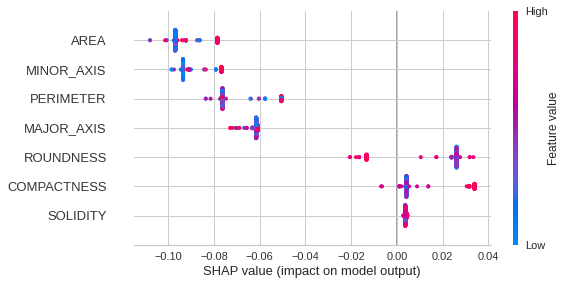

In [68]:
explainer = shap.TreeExplainer(tuned_rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[1], X)

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

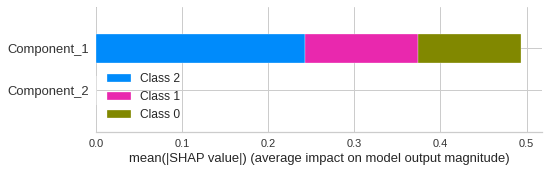

In [69]:
interpret_model(tuned_rf_pca, plot='summary')

In [70]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [71]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [72]:
interpret_model(tuned_rf_pca, plot='reason')